Other notes : 
-  

In [153]:
from pykeen.pipeline import pipeline
from pykeen.hpo import hpo_pipeline
from pykeen import predict
import pykeen.models
from pykeen.datasets import Countries
from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline
import pandas as pd
from pykeen.models import TransE
from pykeen.evaluation import RankBasedEvaluator

In [154]:
#creating SPO triples
path = '/Users/alecstear/Documents/GitHub/Knowledge_Graph/Merged_querys.tsv'
triples_df = TriplesFactory.from_path(path)

In [155]:
triples_df.relation_to_id

{'': 0,
 'causes_condition': 1,
 'decrease_activity': 2,
 'decrease_effect': 3,
 'decrease_efficacy': 4,
 'has_activity': 5,
 'has_code': 6,
 'has_effect': 7,
 'has_indication': 8,
 'has_side_effect': 9,
 'has_target': 10,
 'increase_activity': 11,
 'increase_effect': 12,
 'increase_efficacy': 13,
 'is_affecting': 14,
 'is_substance_that_treats': 15,
 'predicat': 16}

## 1. Model TransE

### 1.1 Training the model

In [3]:
training, testing = triples_df.split()
result_TransE = pipeline(training=training, testing=testing, model='TransE', epochs=50)  # short epochs for testing - you should go higher)

using automatically assigned random_state=4281310832
No random seed is specified. Setting to 3353506757.
No cuda devices were available. The model runs on CPU


Training epochs on cpu:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/1.41k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.33s seconds


In [40]:
#This prints the PCA, and the evolution of the loss over time. 
#result.plot()

### 1.2 Getting the scores

In [4]:
# Create an evaluator
evaluator = RankBasedEvaluator()

# Evaluate the model
metrics = evaluator.evaluate(result_TransE.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/1.41k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.31s seconds


Hits@1: 0.03873489694385217
Hits@3: 0.16844349680170576
Hits@5: 0.2224591329068941
Hits@10: 0.2967306325515281
Mean Reciprocal Rank: 0.1297653466463089


In [7]:
metrics

In [8]:
model_1=result_TransE.model

#testing_mapped_triples = Countries().testing.mapped_triples.to(model.device)
top_20_predictions_df = predict.predict_all(model_1, k=20).process().df
pd.DataFrame(top_20_predictions_df).to_csv("disease_prediction.tsv",sep="\t",index=False,header=False)
file=pd.read_csv("disease_prediction.tsv", sep="\t", names=["head","relation","tail","score"])
file.head()

NameError: name 'result' is not defined

In [ ]:
# Run the results with different models. 
# Find different models. 
# Run the Hits and the others. 

In [9]:
predictions_df = predict.predict_all(model).process().df
top_20_predictions_df = predict.predict_all(model, k=20).process().df

pd.DataFrame(top_20_predictions_df).to_csv("top_20_predictions_diseases.tsv",sep="\t",index=False,header=False)
pd.DataFrame(predictions_df).to_csv("predictions_diseases.tsv",sep="\t",index=False,header=False)

NameError: name 'model' is not defined

## 2. ComplexE model

In [48]:
training, testing = triples_df.split()
result_ComplexE = pipeline(training=training, testing=testing, model='ComplEx', epochs=50) 

INFO:pykeen.triples.splitting:done splitting triples to groups of sizes [2849, 1407]
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cpu:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/1.41k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 2.93s seconds


In [49]:
# Create an evaluator
evaluator = RankBasedEvaluator()

# Evaluate the model
metrics = evaluator.evaluate(result_ComplexE.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/1.41k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 2.93s seconds


Hits@1: 0.00035536602700781805
Hits@3: 0.0007107320540156361
Hits@5: 0.0007107320540156361
Hits@10: 0.0017768301350390902
Mean Reciprocal Rank: 0.002785974182188511


In [51]:
#model_1=result.model

#testing_mapped_triples = Countries().testing.mapped_triples.to(model.device)
#top_20_predictions_df = predict.predict_all(model_1, k=20).process().df
#pd.DataFrame(top_20_predictions_df).to_csv("disease_prediction.tsv",sep="\t",index=False,header=False)
#file=pd.read_csv("disease_prediction.tsv", sep="\t", names=["head","relation","tail","score"])
#file.head()

## 3. DistMult model

In [156]:
training, testing, validation = triples_df.split([.8, .1, .1])
result_DistMult = pipeline(
    training=training, 
    testing=testing,
    validation=validation,
    model='DistMult', 
    epochs=100
) 

INFO:pykeen.triples.splitting:done splitting triples to groups of sizes [2849, 703, 704]
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/22 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/703 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.19s seconds


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>,
        <Axes: title={'center': 'Entity Plot using PCA'}>], dtype=object))

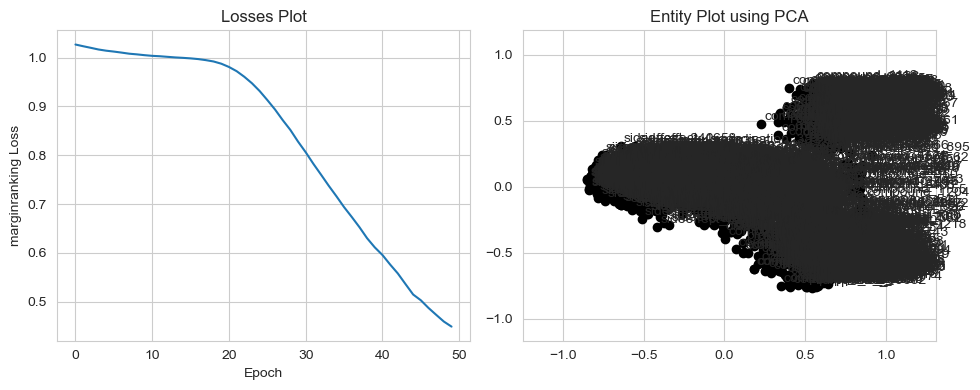

In [142]:
result.plot()

In [123]:
# Create an evaluator
evaluator = RankBasedEvaluator()

# Evaluate the model
metrics = evaluator.evaluate(result_DistMult.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/703 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.19s seconds


Hits@1: 0.1593172119487909
Hits@3: 0.32930298719772405
Hits@5: 0.492176386913229
Hits@10: 0.5938833570412517
Mean Reciprocal Rank: 0.2890373170375824


## 4. Total Hits per model, with 50 epochs. 

In [34]:
results_data = {
    'Model': ['Model_TransE', 'Model_ ComplexE', 'Model_DistMult'],
    'Hits@1': [0.0, 0.00035536602700781805, 0.28216062544420756],
    'Hits@3': [0.0007107320540156361, 0.0007107320540156361, 0.4864960909737029],
    'Hits@5': [0.0010660980810234541, 0.0007107320540156361, 0.6119402985074627],
    'Hits@10': [0.0028429282160625444, 0.0017768301350390902, 0.7089552238805971],
    'Mean Reciprocal Rank': [0.0037332717329263687, 0.002785974182188511, 0.41416028141975403]
}

#Cleaning data and setting in the right order
results_data_df = pd.DataFrame(results_data)
results_data_df = results_data_df.T
results_data_df.columns = results_data_df.iloc[0]
results_data_df = results_data_df[1:]
results_data_df.to_csv('model_results.csv', index=False)

In [35]:
results_data
results_data_df = pd.DataFrame(results_data)

{'Model': ['Model_TransE', 'Model_ ComplexE', 'Model_DistMult'],
 'Hits@1': [0.0, 0.00035536602700781805, 0.28216062544420756],
 'Hits@3': [0.0007107320540156361, 0.0007107320540156361, 0.4864960909737029],
 'Hits@5': [0.0010660980810234541, 0.0007107320540156361, 0.6119402985074627],
 'Hits@10': [0.0028429282160625444, 0.0017768301350390902, 0.7089552238805971],
 'Mean Reciprocal Rank': [0.0037332717329263687,
  0.002785974182188511,
  0.41416028141975403]}

In [78]:
results_data_df

Model,Model_TransE,Model_ ComplexE,Model_DistMult
Hits@1,0.0,0.000355,0.282161
Hits@3,0.000711,0.000711,0.486496
Hits@5,0.001066,0.000711,0.61194
Hits@10,0.002843,0.001777,0.708955
Mean Reciprocal Rank,0.003733,0.002786,0.41416


## Modifying the parameters. 

Try tweaking the parameters of the different models, using HPO

In [133]:
hpo_pipeline_result = hpo_pipeline(
    model="DistMult", 
    training=training,
    testing=testing,
    validation=validation,
    n_trials=30, 
    training_kwargs=dict(
        num_workers=10,
        batch_size=32,
    ),
    model_kwargs_ranges=dict(
        embedding_dim=dict(type=int, low=16, high=256, step=32),
    ),
    lr_scheduler="ExponentialLR",
    lr_scheduler_kwargs_ranges=dict(
    gamma=dict(type=float, low=0.8, high=1.0),
    ),
    stopper='early',
    stopper_kwargs=dict(frequency=5, patience=2, relative_delta=0.002),
    negative_sampler_kwargs_ranges=dict(
        num_negs_per_pos=dict(type=int, low=1, high=100),
    ),
)

hpo_pipeline_result.save_to_directory("TransE_AD_HPO")

[I 2023-12-14 18:48:13,364] A new study created in memory with name: no-name-61a21d02-9c59-409a-a2a9-47753b07f446
INFO:pykeen.hpo.hpo:Using model: <class 'pykeen.models.unimodal.distmult.DistMult'>
INFO:pykeen.hpo.hpo:Using loss: <class 'pykeen.losses.MarginRankingLoss'>
INFO:pykeen.hpo.hpo:Using regularizer: <class 'pykeen.regularizers.LpRegularizer'>
INFO:pykeen.hpo.hpo:Using optimizer: <class 'torch.optim.adam.Adam'>
INFO:pykeen.hpo.hpo:Using lr_scheduler: <class 'torch.optim.lr_scheduler.ExponentialLR'>
INFO:pykeen.hpo.hpo:Using training loop: <class 'pykeen.training.slcwa.SLCWATrainingLoop'>
INFO:pykeen.hpo.hpo:Using negative sampler: <class 'pykeen.sampling.basic_negative_sampler.BasicNegativeSampler'>
INFO:pykeen.hpo.hpo:Using evaluator: <class 'pykeen.evaluation.rank_based_evaluator.RankBasedEvaluator'>
INFO:pykeen.hpo.hpo:Attempting to maximize both.realistic.inverse_harmonic_mean_rank
INFO:pykeen.hpo.hpo:Filter validation triples when testing: True
/Users/alecstear/anaconda3/

Training epochs on cpu:   0%|          | 0/300 [00:00<?, ?epoch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x161bdde40> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x161bdde40> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.18s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.0078125. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-496a419f-0367-4236-923d-4c96e5a00c29.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.19s seconds


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.18s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 15: 0.01278409090909091. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-496a419f-0367-4236-923d-4c96e5a00c29.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 15.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.18s seconds


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.18s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 25: 0.019886363636363636. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-496a419f-0367-4236-923d-4c96e5a00c29.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 25.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.19s seconds


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.18s seconds
INFO:pykeen.stoppers.early_stopping:Stopping early at epoch 35. The best result 0.019886363636363636 occurred at epoch 25.
INFO:pykeen.stoppers.early_stopping:Re-loading weights from best epoch from /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-496a419f-0367-4236-923d-4c96e5a00c29.pt
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/704 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.19s seconds
[I 2023-12-14 18:50:56,854] Trial 0 finished with value: 0.015734916552901268 and parameters: {'model.embedding_dim': 80, 'loss.margin': 1.309630278654025, 'regularizer.weight': 0.6712578588453458, 'optimizer.lr': 0.01954044924196968, 'lr_scheduler.gamma': 0.9768074006819019, 'negative_sampler.num_negs_per_pos': 26, 'training.num_epochs': 300}. Best is trial 0 with value: 0.015734916552901268.
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-e2e6636b-aa8a-4d8e-8af2-911584e46812.pt


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x161ac9c00> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x161ac9c00> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.31s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.002130681818181818. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-e2e6636b-aa8a-4d8e-8af2-911584e46812.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.28s seconds


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.29s seconds
INFO:pykeen.stoppers.early_stopping:Stopping early at epoch 15. The best result 0.002130681818181818 occurred at epoch 5.
INFO:pykeen.stoppers.early_stopping:Re-loading weights from best epoch from /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-e2e6636b-aa8a-4d8e-8af2-911584e46812.pt
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/704 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.31s seconds
[I 2023-12-14 18:52:19,328] Trial 1 finished with value: 0.002459656447172165 and parameters: {'model.embedding_dim': 176, 'loss.margin': 1.016502445771856, 'regularizer.weight': 0.511998172487093, 'optimizer.lr': 0.08363550364870466, 'lr_scheduler.gamma': 0.9244813904513779, 'negative_sampler.num_negs_per_pos': 36, 'training.num_epochs': 100}. Best is trial 0 with value: 0.015734916552901268.
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-2f1fe331-de45-4c79-8399-14918e88b67e.pt


Training epochs on cpu:   0%|          | 0/300 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x161c30310> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x161c30310> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.004971590909090909. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-2f1fe331-de45-4c79-8399-14918e88b67e.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 10: 0.06178977272727273. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-2f1fe331-de45-4c79-8399-14918e88b67e.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 10.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.stoppers.early_stopping:Stopping early at epoch 20. The best result 0.06178977272727273 occurred at epoch 10.
INFO:pykeen.stoppers.early_stopping:Re-loading weights from best epoch from /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-2f1fe331-de45-4c79-8399-14918e88b67e.pt
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/704 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2023-12-14 18:54:01,734] Trial 2 finished with value: 0.046544481068849564 and parameters: {'model.embedding_dim': 48, 'loss.margin': 2.294762788928916, 'regularizer.weight': 0.44002787460702003, 'optimizer.lr': 0.08564342142825232, 'lr_scheduler.gamma': 0.8185884635484327, 'negative_sampler.num_negs_per_pos': 100, 'training.num_epochs': 300}. Best is trial 2 with value: 0.046544481068849564.
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-4a5a381b-fd27-4275-bfb0-3732297f8465.pt


Training epochs on cpu:   0%|          | 0/200 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x161caff40> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x161caff40> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.30s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.0035511363636363635. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-4a5a381b-fd27-4275-bfb0-3732297f8465.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.31s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 10: 0.004971590909090909. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-4a5a381b-fd27-4275-bfb0-3732297f8465.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 10.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.31s seconds


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.31s seconds
INFO:pykeen.stoppers.early_stopping:Stopping early at epoch 20. The best result 0.004971590909090909 occurred at epoch 10.
INFO:pykeen.stoppers.early_stopping:Re-loading weights from best epoch from /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-4a5a381b-fd27-4275-bfb0-3732297f8465.pt
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/704 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.35s seconds
[I 2023-12-14 18:55:49,272] Trial 3 finished with value: 0.003999121021479368 and parameters: {'model.embedding_dim': 208, 'loss.margin': 1.0401428684438354, 'regularizer.weight': 0.9834389187027818, 'optimizer.lr': 0.02764233610587759, 'lr_scheduler.gamma': 0.9637915533214821, 'negative_sampler.num_negs_per_pos': 1, 'training.num_epochs': 200}. Best is trial 2 with value: 0.046544481068849564.
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-a1a10caa-3e0f-4b2f-8d6d-e0f765f1d7d5.pt


Training epochs on cpu:   0%|          | 0/400 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x161d62b90> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x161d62b90> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.05042613636363636. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-a1a10caa-3e0f-4b2f-8d6d-e0f765f1d7d5.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 10: 0.05823863636363636. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-a1a10caa-3e0f-4b2f-8d6d-e0f765f1d7d5.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 10.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 15: 0.060369318181818184. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-a1a10caa-3e0f-4b2f-8d6d-e0f765f1d7d5.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 15.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
INFO:pykeen.stoppers.early_stopping:Stopping early at epoch 25. The best result 0.060369318181818184 occurred at epoch 15.
INFO:pykeen.stoppers.early_stopping:Re-loading weights from best epoch from /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-a1a10caa-3e0f-4b2f-8d6d-e0f765f1d7d5.pt
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/704 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2023-12-14 18:57:55,782] Trial 4 finished with value: 0.039178892970085144 and parameters: {'model.embedding_dim': 48, 'loss.margin': 0.1911524967083843, 'regularizer.weight': 0.6086928359486038, 'optimizer.lr': 0.03311375057668112, 'lr_scheduler.gamma': 0.8585407936034539, 'negative_sampler.num_negs_per_pos': 85, 'training.num_epochs': 400}. Best is trial 2 with value: 0.046544481068849564.
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-11d9b61c-1e60-4c46-a570-dd7eccaa920d.pt


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x161d39cc0> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x161d39cc0> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.022727272727272728. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-11d9b61c-1e60-4c46-a570-dd7eccaa920d.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 10: 0.060369318181818184. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-11d9b61c-1e60-4c46-a570-dd7eccaa920d.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 10.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 15: 0.06392045454545454. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-11d9b61c-1e60-4c46-a570-dd7eccaa920d.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 15.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 20: 0.06463068181818182. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-11d9b61c-1e60-4c46-a570-dd7eccaa920d.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 20.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
INFO:pykeen.stoppers.early_stopping:Stopping early at epoch 30. The best result 0.06463068181818182 occurred at epoch 20.
INFO:pykeen.stoppers.early_stopping:Re-loading weights from best epoch from /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-11d9b61c-1e60-4c46-a570-dd7eccaa920d.pt
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/704 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2023-12-14 19:00:24,569] Trial 5 finished with value: 0.060390207916498184 and parameters: {'model.embedding_dim': 48, 'loss.margin': 2.8360582132635925, 'regularizer.weight': 0.0879717962110302, 'optimizer.lr': 0.02049997510714191, 'lr_scheduler.gamma': 0.8156918486221183, 'negative_sampler.num_negs_per_pos': 13, 'training.num_epochs': 100}. Best is trial 5 with value: 0.060390207916498184.
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-4a8670e4-243b-41e3-93b8-f0781cf0f75f.pt


Training epochs on cpu:   0%|          | 0/400 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x161d7d570> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x161d7d570> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.22s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.03409090909090909. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-4a8670e4-243b-41e3-93b8-f0781cf0f75f.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.21s seconds


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.21s seconds
INFO:pykeen.hpo.hpo:Pruned trial: <optuna.trial._trial.Trial object at 0x161acaf50> at epoch 15 due to both.realistic.inverse_harmonic_mean_rank=0.019886363636363636
[I 2023-12-14 19:01:48,273] Trial 6 pruned. 
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-ffee6de8-ad52-4330-9ee9-b0907b7a685b.pt


Training epochs on cpu:   0%|          | 0/800 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x1620899f0> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x1620899f0> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.29s seconds
INFO:pykeen.hpo.hpo:Pruned trial: <optuna.trial._trial.Trial object at 0x161ceffa0> at epoch 5 due to both.realistic.inverse_harmonic_mean_rank=0.002130681818181818
[I 2023-12-14 19:06:17,672] Trial 7 pruned. 
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-b04b5ded-148e-4b50-997e-17fe77af6f99.pt


Training epochs on cpu:   0%|          | 0/500 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x162088910> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x162088910> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.27s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.006392045454545455. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-b04b5ded-148e-4b50-997e-17fe77af6f99.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.25s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 10: 0.04758522727272727. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-b04b5ded-148e-4b50-997e-17fe77af6f99.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 10.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.24s seconds


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.25s seconds
INFO:pykeen.hpo.hpo:Pruned trial: <optuna.trial._trial.Trial object at 0x16202cf10> at epoch 20 due to both.realistic.inverse_harmonic_mean_rank=0.002130681818181818
[I 2023-12-14 19:24:21,339] Trial 8 pruned. 
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-8900eabb-c625-4f7a-a417-e4c2ed07f835.pt


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x161ee85e0> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x161ee85e0> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.01775568181818182. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-8900eabb-c625-4f7a-a417-e4c2ed07f835.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.hpo.hpo:Pruned trial: <optuna.trial._trial.Trial object at 0x1620ee8f0> at epoch 10 due to both.realistic.inverse_harmonic_mean_rank=0.0035511363636363635
[I 2023-12-14 19:27:04,351] Trial 9 pruned. 
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-0454dcd3-92c1-4841-bfe6-0b46336892f1.pt


Training epochs on cpu:   0%|          | 0/800 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x162152500> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x162152500> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.0078125. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-0454dcd3-92c1-4841-bfe6-0b46336892f1.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.hpo.hpo:Pruned trial: <optuna.trial._trial.Trial object at 0x161d3b580> at epoch 10 due to both.realistic.inverse_harmonic_mean_rank=0.014204545454545454
[I 2023-12-14 19:33:17,722] Trial 10 pruned. 
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-24011b31-40c8-4574-94bd-ab1fe1e77369.pt


Training epochs on cpu:   0%|          | 0/1000 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x16202d270> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x16202d270> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.007102272727272727. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-24011b31-40c8-4574-94bd-ab1fe1e77369.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 10: 0.05894886363636364. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-24011b31-40c8-4574-94bd-ab1fe1e77369.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 10.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 15: 0.05965909090909091. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-24011b31-40c8-4574-94bd-ab1fe1e77369.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 15.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 25: 0.06178977272727273. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-24011b31-40c8-4574-94bd-ab1fe1e77369.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 25.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
INFO:pykeen.stoppers.early_stopping:Stopping early at epoch 35. The best result 0.06178977272727273 occurred at epoch 25.
INFO:pykeen.stoppers.early_stopping:Re-loading weights from best epoch from /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-24011b31-40c8-4574-94bd-ab1fe1e77369.pt
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/704 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.18s seconds
[I 2023-12-14 21:26:50,976] Trial 11 finished with value: 0.05965118482708931 and parameters: {'model.embedding_dim': 80, 'loss.margin': 2.9866301946240243, 'regularizer.weight': 0.35724107404748146, 'optimizer.lr': 0.054992441758985766, 'lr_scheduler.gamma': 0.8044854043358493, 'negative_sampler.num_negs_per_pos': 100, 'training.num_epochs': 1000}. Best is trial 5 with value: 0.060390207916498184.
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-a23a0fa1-6726-45d4-8446-49a7e29ef4f7.pt


Training epochs on cpu:   0%|          | 0/1000 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x162113550> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x162113550> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.21s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.0234375. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-a23a0fa1-6726-45d4-8446-49a7e29ef4f7.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.22s seconds
INFO:pykeen.hpo.hpo:Pruned trial: <optuna.trial._trial.Trial object at 0x161cee050> at epoch 10 due to both.realistic.inverse_harmonic_mean_rank=0.019176136363636364
[I 2023-12-14 22:51:59,221] Trial 12 pruned. 
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-696c6ff3-cdbe-4937-b061-fa6a721b52d4.pt


Training epochs on cpu:   0%|          | 0/700 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x163823b20> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x163823b20> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.015625. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-696c6ff3-cdbe-4937-b061-fa6a721b52d4.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
INFO:pykeen.hpo.hpo:Pruned trial: <optuna.trial._trial.Trial object at 0x161ee9120> at epoch 10 due to both.realistic.inverse_harmonic_mean_rank=0.002130681818181818
[I 2023-12-14 23:40:26,067] Trial 13 pruned. 
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-8438d298-533e-4ea3-ac2a-9b8a951458db.pt


Training epochs on cpu:   0%|          | 0/1000 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x162153e80> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x162153e80> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.36s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.019176136363636364. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-8438d298-533e-4ea3-ac2a-9b8a951458db.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.18s seconds
INFO:pykeen.hpo.hpo:Pruned trial: <optuna.trial._trial.Trial object at 0x1638634c0> at epoch 10 due to both.realistic.inverse_harmonic_mean_rank=0.011363636363636364
[I 2023-12-14 23:41:31,611] Trial 14 pruned. 
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-a994760a-e81c-4f18-af14-2089ae5dccb4.pt


Training epochs on cpu:   0%|          | 0/700 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x163821630> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x163821630> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.014914772727272728. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-a994760a-e81c-4f18-af14-2089ae5dccb4.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.hpo.hpo:Pruned trial: <optuna.trial._trial.Trial object at 0x163861270> at epoch 10 due to both.realistic.inverse_harmonic_mean_rank=0.002130681818181818
[I 2023-12-14 23:42:18,530] Trial 15 pruned. 
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-ed46d5c9-8407-41a3-894a-60e20e8ae8f2.pt


Training epochs on cpu:   0%|          | 0/600 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x162113460> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x162113460> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.24s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.008522727272727272. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-ed46d5c9-8407-41a3-894a-60e20e8ae8f2.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.24s seconds
INFO:pykeen.hpo.hpo:Pruned trial: <optuna.trial._trial.Trial object at 0x1638f7610> at epoch 10 due to both.realistic.inverse_harmonic_mean_rank=0.005681818181818182
[I 2023-12-14 23:43:09,981] Trial 16 pruned. 
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-7904c8d5-5943-4bd8-8cb1-e88749eb31ad.pt


Training epochs on cpu:   0%|          | 0/900 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x1638901f0> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x1638901f0> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.02911931818181818. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-7904c8d5-5943-4bd8-8cb1-e88749eb31ad.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.hpo.hpo:Pruned trial: <optuna.trial._trial.Trial object at 0x1638f6b60> at epoch 10 due to both.realistic.inverse_harmonic_mean_rank=0.004971590909090909
[I 2023-12-14 23:44:06,149] Trial 17 pruned. 
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-8920af9b-f478-4799-ba73-3e75f153d7db.pt


Training epochs on cpu:   0%|          | 0/500 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x1638c0b50> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x1638c0b50> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.63s seconds
INFO:pykeen.hpo.hpo:Pruned trial: <optuna.trial._trial.Trial object at 0x162111810> at epoch 5 due to both.realistic.inverse_harmonic_mean_rank=0.002840909090909091
[I 2023-12-14 23:44:43,797] Trial 18 pruned. 
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-6877e828-fe3e-46b9-b982-eac479e26690.pt


Training epochs on cpu:   0%|          | 0/600 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x163977520> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x163977520> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.21s seconds
INFO:pykeen.hpo.hpo:Pruned trial: <optuna.trial._trial.Trial object at 0x16202d270> at epoch 5 due to both.realistic.inverse_harmonic_mean_rank=0.002130681818181818
[I 2023-12-14 23:45:17,108] Trial 19 pruned. 
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-94988e4c-c75c-49f4-b68f-e7975c303181.pt


Training epochs on cpu:   0%|          | 0/900 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x163974190> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x163974190> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.007102272727272727. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-94988e4c-c75c-49f4-b68f-e7975c303181.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.hpo.hpo:Pruned trial: <optuna.trial._trial.Trial object at 0x163977250> at epoch 10 due to both.realistic.inverse_harmonic_mean_rank=0.004971590909090909
[I 2023-12-14 23:46:50,193] Trial 20 pruned. 
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-a3bb063e-b552-4ae1-92a2-261fe61658c8.pt


Training epochs on cpu:   0%|          | 0/200 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x163977a60> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x163977a60> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.02130681818181818. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-a3bb063e-b552-4ae1-92a2-261fe61658c8.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.hpo.hpo:Pruned trial: <optuna.trial._trial.Trial object at 0x1639746d0> at epoch 10 due to both.realistic.inverse_harmonic_mean_rank=0.0007102272727272727
[I 2023-12-14 23:48:10,257] Trial 21 pruned. 
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-ba83c51c-78bc-42d0-91f1-08c75c369002.pt


Training epochs on cpu:   0%|          | 0/200 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x1638c37c0> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x1638c37c0> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.026278409090909092. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-ba83c51c-78bc-42d0-91f1-08c75c369002.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.49s seconds
INFO:pykeen.hpo.hpo:Pruned trial: <optuna.trial._trial.Trial object at 0x1639e5120> at epoch 10 due to both.realistic.inverse_harmonic_mean_rank=0.004261363636363636
[I 2023-12-14 23:49:28,114] Trial 22 pruned. 
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-c1fca135-a391-47d8-8e62-3eebd25a75e6.pt


Training epochs on cpu:   0%|          | 0/300 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x163862890> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x163862890> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.0234375. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-c1fca135-a391-47d8-8e62-3eebd25a75e6.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.18s seconds
INFO:pykeen.hpo.hpo:Pruned trial: <optuna.trial._trial.Trial object at 0x163975c60> at epoch 10 due to both.realistic.inverse_harmonic_mean_rank=0.019886363636363636
[I 2023-12-14 23:50:32,932] Trial 23 pruned. 
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-987c3d41-c7ac-4d7c-88aa-9ac2f85c78cb.pt


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x1639e4850> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x1639e4850> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.32s seconds
INFO:pykeen.hpo.hpo:Pruned trial: <optuna.trial._trial.Trial object at 0x163862470> at epoch 5 due to both.realistic.inverse_harmonic_mean_rank=0.0014204545454545455
[I 2023-12-14 23:51:21,106] Trial 24 pruned. 
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-2119a4cb-2936-4c9c-ba17-2b9d8b6f4566.pt


Training epochs on cpu:   0%|          | 0/300 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x163a7cdc0> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x163a7cdc0> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.02130681818181818. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-2119a4cb-2936-4c9c-ba17-2b9d8b6f4566.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.hpo.hpo:Pruned trial: <optuna.trial._trial.Trial object at 0x163a4a2f0> at epoch 10 due to both.realistic.inverse_harmonic_mean_rank=0.0007102272727272727
[I 2023-12-14 23:52:37,735] Trial 25 pruned. 
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-e5bed0fa-c3eb-4abf-9cba-f9fca05d973e.pt


Training epochs on cpu:   0%|          | 0/400 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x163abeaa0> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x163abeaa0> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.06321022727272728. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-e5bed0fa-c3eb-4abf-9cba-f9fca05d973e.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.stoppers.early_stopping:Stopping early at epoch 15. The best result 0.06321022727272728 occurred at epoch 5.
INFO:pykeen.stoppers.early_stopping:Re-loading weights from best epoch from /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-e5bed0fa-c3eb-4abf-9cba-f9fca05d973e.pt
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/704 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
[I 2023-12-14 23:54:54,683] Trial 26 finished with value: 0.06291188299655914 and parameters: {'model.embedding_dim': 48, 'loss.margin': 2.0979204042564246, 'regularizer.weight': 0.5746025207561224, 'optimizer.lr': 0.040122354990563706, 'lr_scheduler.gamma': 0.8537418725264289, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 400}. Best is trial 26 with value: 0.06291188299655914.
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-fdb43505-3c65-4c86-b651-28342508f57a.pt


Training epochs on cpu:   0%|          | 0/400 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.21s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.014204545454545454. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-fdb43505-3c65-4c86-b651-28342508f57a.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.21s seconds
INFO:pykeen.hpo.hpo:Pruned trial: <optuna.trial._trial.Trial object at 0x163862470> at epoch 10 due to both.realistic.inverse_harmonic_mean_rank=0.016335227272727272
[I 2023-12-14 23:56:28,099] Trial 27 pruned. 
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-7543781d-dd0f-488f-9239-06c7a74ed8d9.pt


Training epochs on cpu:   0%|          | 0/700 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x163b22500> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x163b22500> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.044744318181818184. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-7543781d-dd0f-488f-9239-06c7a74ed8d9.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.20s seconds
INFO:pykeen.hpo.hpo:Pruned trial: <optuna.trial._trial.Trial object at 0x16113c940> at epoch 10 due to both.realistic.inverse_harmonic_mean_rank=0.05823863636363636
[I 2023-12-14 23:58:36,067] Trial 28 pruned. 
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-3ca9e975-9328-4fb9-8818-ea29d15455db.pt


Training epochs on cpu:   0%|          | 0/500 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x163bfc8e0> was reported to be 176 (when accessing len(dataloader)), but 177 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
/Users/alecstear/anaconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <pykeen.triples.instances.BatchedSLCWAInstances object at 0x163bfc8e0> was reported to be 176 (when accessing len(dataloader)), but 178 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/d

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.03835227272727273. Saved model weights to /Users/alecstear/.data/pykeen/checkpoints/best-model-weights-3ca9e975-9328-4fb9-8818-ea29d15455db.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.


Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/176 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
INFO:pykeen.hpo.hpo:Pruned trial: <optuna.trial._trial.Trial object at 0x163b5d990> at epoch 10 due to both.realistic.inverse_harmonic_mean_rank=0.015625
[I 2023-12-14 23:59:37,668] Trial 29 pruned. 


## Predictions for the best functionning model. 

In [130]:
hpo_pipeline_result.configuration

AttributeError: 'HpoPipelineResult' object has no attribute 'configuration'

In [145]:
model_DistMult=result_DistMult.model

#testing_mapped_triples = Countries().testing.mapped_triples.to(model.device)
top_20_predictions_df = predict.predict_all(model_DistMult, k=2000000).process().df
pd.DataFrame(top_20_predictions_df).to_csv("disease_prediction.tsv",sep="\t",index=False,header=False)
file=pd.read_csv("disease_prediction.tsv", sep="\t", names=["head","relation","tail","score"])
file

scoring:   0%|          | 0.00/47.3k [00:00<?, ?batch/s]

,head,relation,tail,score
0,1514,14,702,1.187446
1,702,14,1514,1.187446
2,697,14,1514,1.159073
3,1514,14,697,1.159073
4,207,14,1514,1.152415
...,...,...,...,...
1999995,499,8,1335,0.302025
1999996,740,15,1673,0.302025
1999997,2285,4,2359,0.302025
1999998,1808,4,1411,0.302025


In [149]:
file.to_csv('file_1000000.csv', index=False)

In [147]:
file2 = file[1000000:2000000]

In [150]:
file2.to_csv('file_2000000.csv', index=False)

In [21]:
top_20_predictions_df.to_csv('model_DistMult_prediction.csv', index=False)

## Looking at the best ranked predictions and checking them in Blazegraph. 

We use our predictions of the "file" dataframe, and look at their equivalent in triples_df.entity_to_id dictionnary: 
- exchange the keys and values of that dictionnary
- look up the value for each 3 keys for those 20 triplets. 

In [157]:
new_dict[1075]

'compound_972'

In [120]:
triples_df.entity_to_id["disease_145"]

1165

In [158]:
new_dict_entity = {value: key for key, value in triples_df.entity_to_id.items()}
new_dict_relation = {value: key for key, value in triples_df.relation_to_id.items()}

In [65]:
predicts_top_20 = {1: [new_dict_entity[456], new_dict_relation[4], new_dict_entity[1075]],
    2: [new_dict_entity[1075], new_dict_relation[4], new_dict_entity[456]],
    3: [new_dict_entity[1075], new_dict_relation[4], new_dict_entity[233]],
    4: [new_dict_entity[233], new_dict_relation[4], new_dict_entity[1075]],
    5: [new_dict_entity[1075], new_dict_relation[4], new_dict_entity[1080]],}
predicts_top_20_df = pd.DataFrame(predicts_top_20)
predicts_top_20_df = predicts_top_20_df.T

In [70]:
new_dict_entity[1300]

'disease_2601'

In [66]:
predicts_top_20_df

,0,1,2
1,compound_296,decrease_efficacy,compound_972
2,compound_972,decrease_efficacy,compound_296
3,compound_972,decrease_efficacy,compound_12337
4,compound_12337,decrease_efficacy,compound_972
5,compound_972,decrease_efficacy,compound_9770


In [159]:
def give_triplet(node1, relation, node2, score):
    triplet = f"{new_dict_entity[node1]}, {new_dict_relation[relation]}, {new_dict_entity[node2]}, score {score}"
    return triplet

In [117]:
#Top 10 preditions for substance that treats
result_a1 = give_triplet(1165,15,1075, 0.3435)
result_a2 = give_triplet(2088,15,1330, 0.3409765)
result_a3 = give_triplet(1330,15,24, 0.33683422)
result_a4 = give_triplet(24,15,1330, 0.33683422)
result_a5 = give_triplet(26,15,1235, 0.33047342)
result_a6 = give_triplet(1235,15,26, 0.33047342)
result_a7 = give_triplet(26,15,1318, 0.33047342)
result_a8 = give_triplet(1318,15,26, 0.33047342)
result_a9 = give_triplet(24,15,1235, 0.32751006)
result_a10 = give_triplet(1235,15,24, 0.32751006)

In [166]:
result_a1 = give_triplet(1485,15,1165,0.31751388)
result_a1

'effect_5, is_substance_that_treats, disease_145, score 0.31751388'

In [118]:
print(result_a1, "\n", 
      result_a2,  "\n",result_a3,  "\n",result_a4,  "\n",result_a5,  "\n",result_a6,  "\n",result_a7,  "\n",result_a8, "\n", result_a9, "\n", result_a10)

disease_2883, is_substance_that_treats, compound/compound_718, score 0.3409765 
 compound/compound_718, is_substance_that_treats, disease_2883, score 0.3409765 
 disease_2883, is_substance_that_treats, compound/compound_323, score 0.33683422 
 compound/compound_323, is_substance_that_treats, disease_2883, score 0.33683422 
 compound/compound_718, is_substance_that_treats, disease_2013, score 0.33047342 
 disease_2013, is_substance_that_treats, compound/compound_718, score 0.33047342 
 compound/compound_718, is_substance_that_treats, disease_2712, score 0.33047342 
 disease_2712, is_substance_that_treats, compound/compound_718, score 0.33047342 
 compound/compound_323, is_substance_that_treats, disease_2013, score 0.32751006 
 disease_2013, is_substance_that_treats, compound/compound_323, score 0.32751006
